In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

### (a)

In [2]:
#Loading the data
df = pd.read_csv('TEST2.csv')
df

,DATE,SALE
0,2020-01-01,200
1,2020-02-01,220
2,2020-03-01,210
3,2020-04-01,230
4,2020-05-01,250
5,2020-06-01,270
6,2020-07-01,260
7,2020-08-01,280
8,2020-09-01,300
9,2020-10-01,310


### (b)

In [ ]:
#Checking for missing values
df.isnull().sum()

DATE    0
SALE    0
dtype: int64

In [3]:
#Converting date to datetime and setting as an index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [ ]:
#Viewing the data
df

,SALE
DATE,
2020-01-01,200
2020-02-01,220
2020-03-01,210
2020-04-01,230
2020-05-01,250
2020-06-01,270
2020-07-01,260
2020-08-01,280
2020-09-01,300


### (c)

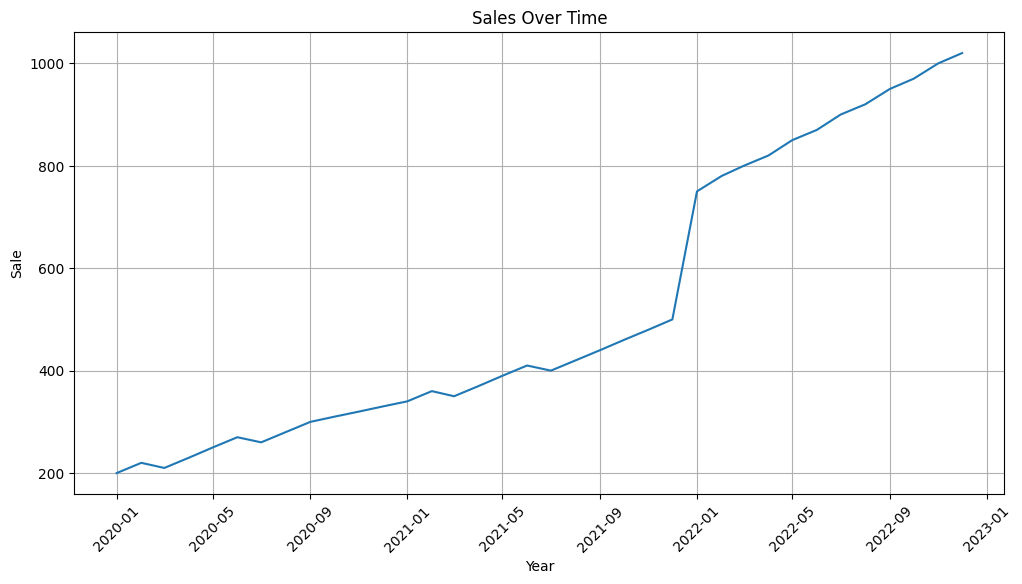

In [4]:
#Plotting the the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['SALE'])
plt.title('Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sale')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

Identifying any trend or seasonality
* From the above graph, we can see a trend in the sales over time ie an increase

### (d(i))

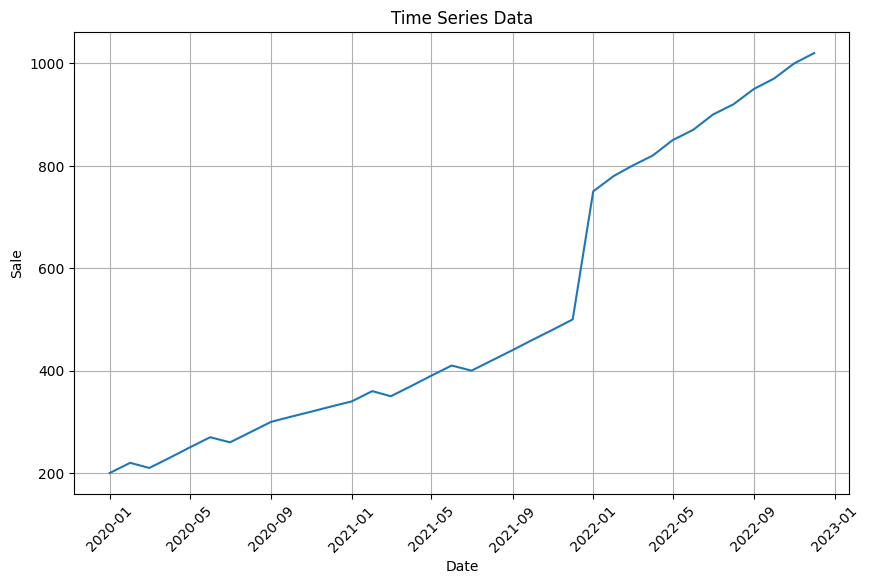

ADF Statistic: 0.7369799070265012
p-value: 0.990547698129568
Critical Values:
   1%: -3.6327426647230316
   5%: -2.9485102040816327
   10%: -2.6130173469387756
Fail to reject the null hypothesis - the time series is non-stationary.


In [ ]:
# Checking for stationary
#Firsting plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Sale')
plt.grid()
plt.show()

# Performing the ADF test
result = adfuller(df)

# Print the results for the ttest
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretation of the results
alpha = 0.05
if result[1] < alpha:
    print("Reject the null hypothesis - the time series is stationary.")
else:
    print("Fail to reject the null hypothesis - the time series is non-stationary.")

### (d(ii))

In [6]:
differenced_series = df.diff()
differenced_series

,SALE
DATE,
2020-01-01,NaN
2020-02-01,20.0
2020-03-01,-10.0
2020-04-01,20.0
2020-05-01,20.0
2020-06-01,20.0
2020-07-01,-10.0
2020-08-01,20.0
2020-09-01,20.0


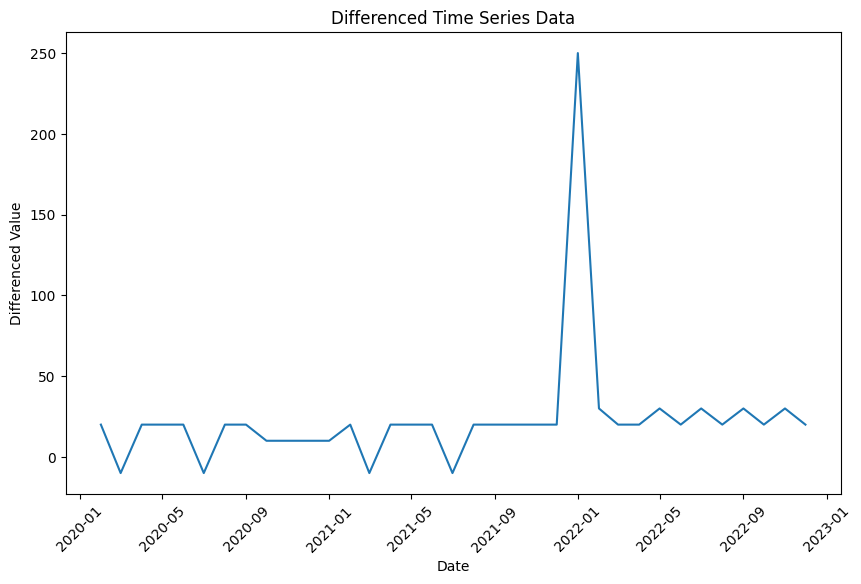

Differenced Series ADF Statistic: -5.444739383392274
Differenced Series p-value: 2.726404221139734e-06
Critical Values:
   1%: -3.639224104416853
   5%: -2.9512301791166293
   10%: -2.614446989619377
Reject the null hypothesis - the differenced time series is stationary.


In [ ]:
#Applying differencing and recheck if not stationary
# Applying differencing
differenced_series = df.diff().dropna() # removes the first value (which is NaN)

# Visualize the differenced series
plt.figure(figsize=(10, 6))
plt.plot(differenced_series)
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Differenced Value')
plt.show()

# Performing the ADF test on the differenced series
result_diff = adfuller(differenced_series)
print('Differenced Series ADF Statistic:', result_diff[0])
print('Differenced Series p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'   {key}: {value}')

alpha = 0.05  
if result_diff[1] < alpha:
    print("Reject the null hypothesis - the differenced time series is stationary.")
else:
    print("Fail to reject the null hypothesis - the differenced time series is non-stationary.")

### (e(i))

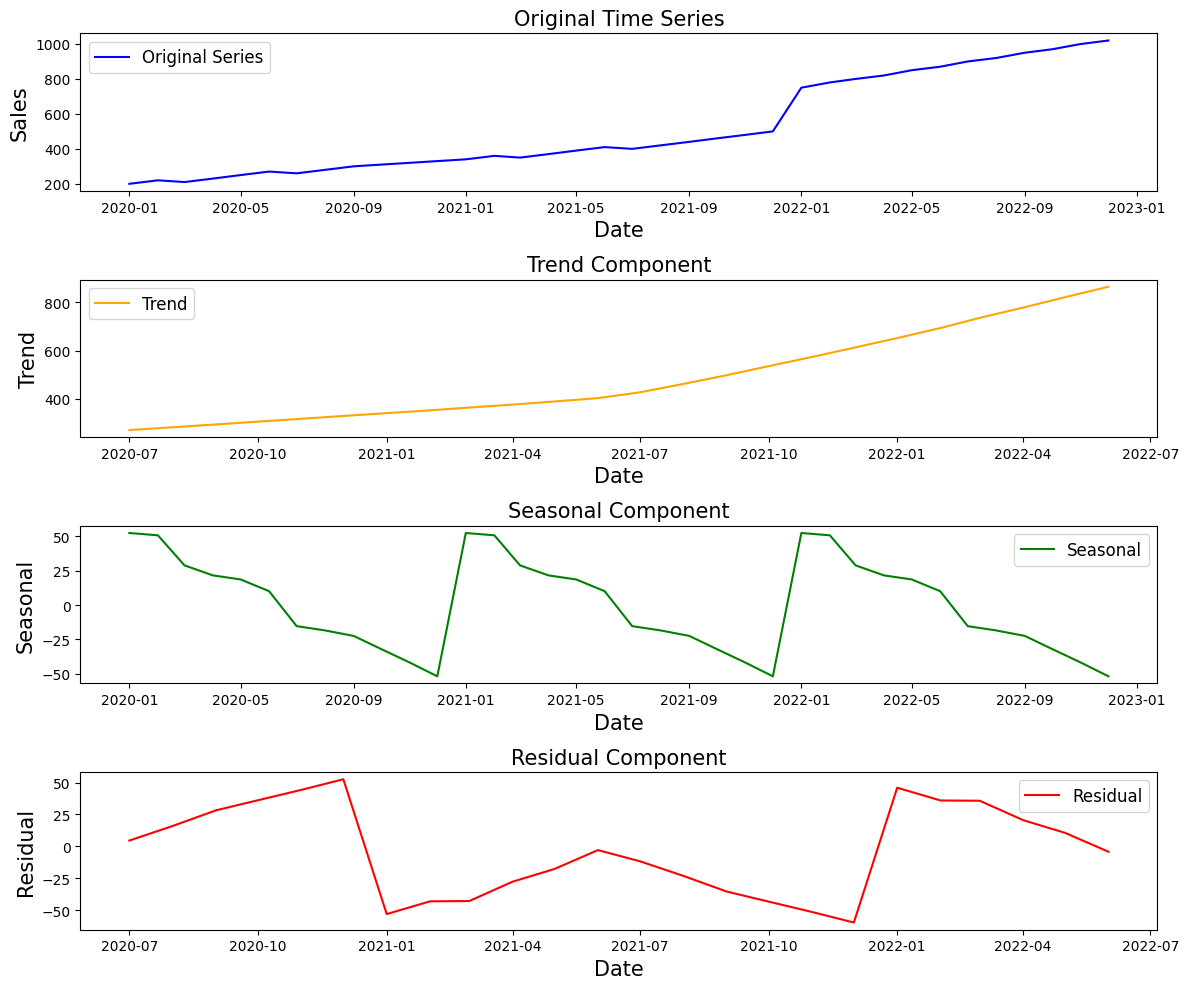

In [ ]:


# Decomposing the time series
decomposition = sm.tsa.seasonal_decompose(df['SALE'], model='additive')

# Extracting the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Creating a DataFrame for the decomposed components
df_decomposed = pd.concat([trend, seasonal, residual], axis=1)
df_decomposed.columns = ['Trend', 'Seasonal', 'Residual']

# Plotting the original series and the decomposed components
plt.figure(figsize=(12, 10))

# Plotting original series
plt.subplot(4, 1, 1)
plt.plot(df['SALE'], label='Original Series', color='blue')
plt.title('Original Time Series', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.legend(fontsize=12)

# Plotting trend component
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Trend', fontsize=15)
plt.legend(fontsize=12)

# Plotting seasonal component
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Seasonal', fontsize=15)
plt.legend(fontsize=12)

# Plotting residual component
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Residual', fontsize=15)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

### (f)

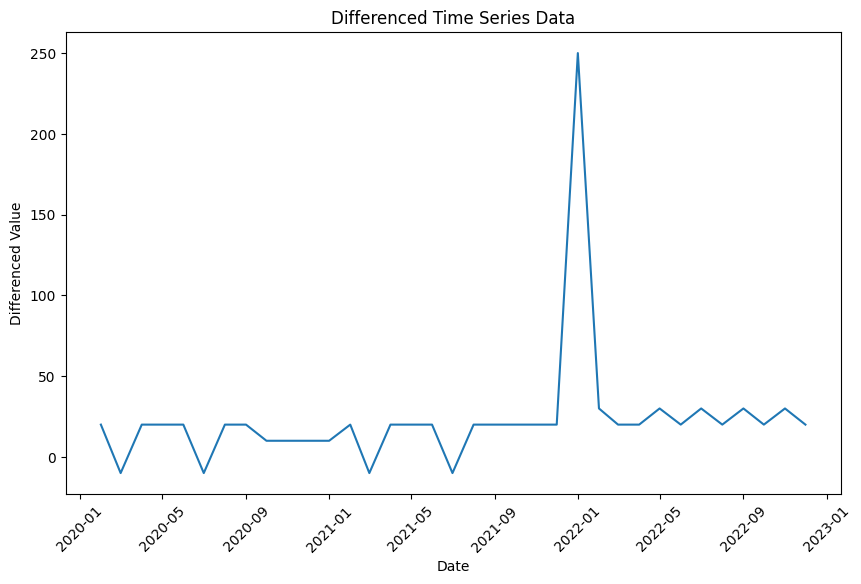

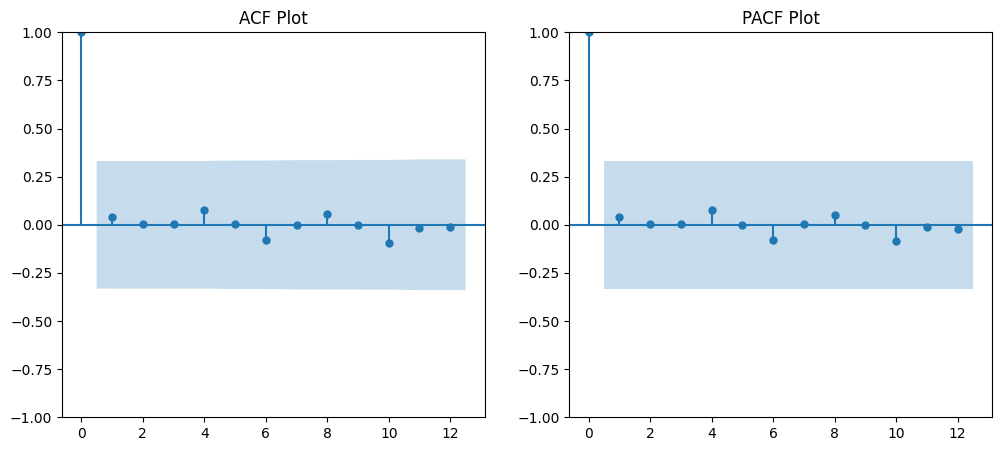

In [44]:

# Visualizing the differenced series
plt.figure(figsize=(10, 6))
plt.plot(differenced_series)
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Differenced Value')
plt.show()

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ACF plot
plot_acf(differenced_series, lags=12, ax=ax[0])
ax[0].set_title('ACF Plot')

# PACF plot
plot_pacf(differenced_series, lags=12, ax=ax[1])
ax[1].set_title('PACF Plot')

plt.show()

In [7]:
#p=2 → Uses 2 lagged values (autoregressive terms).
#d=1 → Differencing applied once to make the data stationary.
#q=2 → Uses 2 past forecast errors (moving average terms).

# Fit the ARIMA model (example with p=2, d=1, q=2)
model = ARIMA(df, order=(1, 1, 1))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   SALE   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -180.587
Date:                Wed, 12 Mar 2025   AIC                            367.174
Time:                        12:45:02   BIC                            371.840
Sample:                    01-01-2020   HQIC                           368.785
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9823      0.275      3.569      0.000       0.443       1.522
ma.L1         -0.8933      0.785     -1.138      0.255      -2.431       0.645
sigma2      1737.2423    253.280      6.859      0.0

### (g) Forecasting and evaluation

In [25]:
df.shape

(36, 1)

#### (i)

In [8]:
# Splitting the data into training and testing sets
train_size = int(len(df) * 0.7)  # 70% for training
train, test = df[:train_size], df[train_size:]

print(f'Training set size: {len(train)}')
print(f'Testing set size: {len(test)}')

Training set size: 25
Testing set size: 11


#### (ii) forecasting sales for test period

In [9]:

model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

forecast_test = len(test)
forecast = model_fit.forecast(steps=forecast_test)

# Printing forecasted sales values
print("Forecasted Sales for the Test Period:")
print(forecast)

C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\Local

Forecasted Sales for the Test Period:
2022-02-01     834.908174
2022-03-01     913.823243
2022-04-01     987.168218
2022-05-01    1055.336257
2022-06-01    1118.692766
2022-07-01    1177.577358
2022-08-01    1232.305676
2022-09-01    1283.171084
2022-10-01    1330.446240
2022-11-01    1374.384555
2022-12-01    1415.221555
Freq: MS, Name: predicted_mean, dtype: float64


RMSE: 279.58


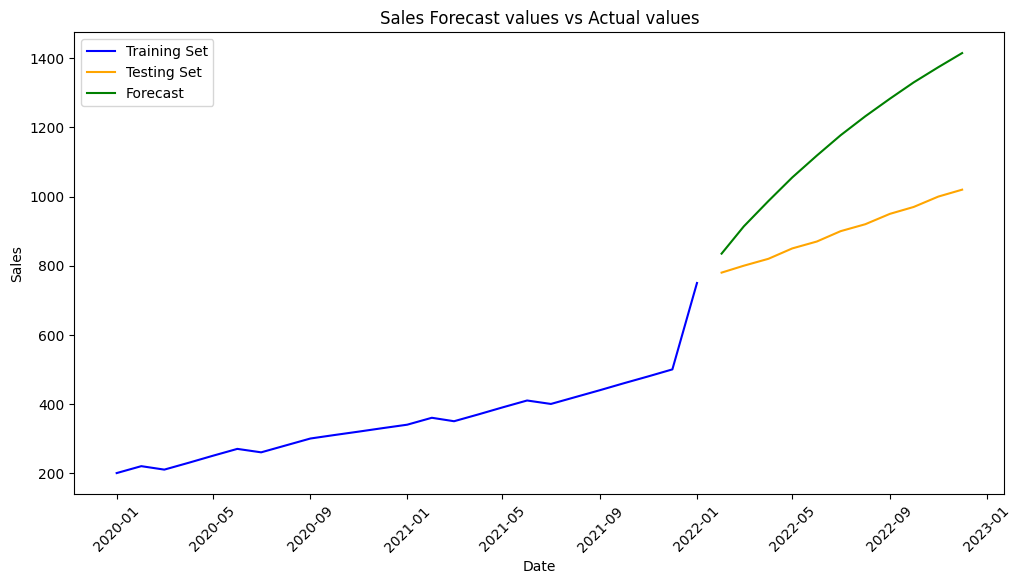

In [10]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.2f}")

# Plotting the forecast against the actual values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test.index, test, label='Testing Set', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('Sales Forecast values vs Actual values')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Sales')
plt.legend()
plt.show()

### 2

**ACF Plot**

* The first lag has a strong autocorrelation for (~1.0). After lag 1, autocorrelation quickly drops close to zero and stays within the blue confidence bands. This suggests the series does not have significant autocorrelation beyond lag 1

**PACF Plot**

* The first lag has a strong partial autocorrelation for (~1.0). Beyond lag 1, values are near zero and within confidence bands. This indicates a potential AR(1) process, where the current value depends only on the previous value.

### 3)

**The RMSE value** 
* Is **277.86**, which means that, on average, the model's forecasted sales deviate from the actual sales by approximately 277.86 units.

* From the graph, the forecasted values are higher than the actual test set values, suggesting that the model overestimates sales therefore the model is not performing well

### 4)

* Instead of *ARIMA*, you can try a **machine learning**-based approach such as Gradient Boosting (XGBoost), Random Forest, or LSTMs. These models works best in handling certain gaps in ARIMA model